Engy-5310: Computational Continuum Transport Phenomena Spring 2021 UMass Lowell; Prof. V. F. de Almeida **19Feb21**

# Howmework 08 (05Mar21)

$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

### Name: `your name`

### Rubric for each assignment: 

|       Context               |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |

### <span style="color:red">Guidance:</span>

+  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
   </span>
+  <span style="color:red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<span style="color:red">, to verify your notebook runs correctly.
   </span>
+  <span style="color:red">
    Save your file again.
   </span>
+  <span style="color:red">
    Upload the notebook file in the Blackboard submission portal as: 
   </span> 
   
   **lastname-firstname-labwork-xx.ipynb**

---
## Table of Assignments<a id="toa"></a>
* [Assignment 1 (40 pts)](#a1) Poisson/Dirichlet 1-D model problem.
 - [1.1)](#a11)(10 pts) Solve problem analytically and obtain the exact energy.
 - [1.2)](#a12)(10 pts) State the Galerkin variational problem and explain the Dirichlet energy.
 - [1.3)](#a13)(20 pts) Solve problem with the Galerkin FEM and MOOSE framework.
* [Assignment 2 (45 pts)](#a2) Poisson/Dirichlet 1-D model problem revisited.
 - [2.1)](#a21)(45 pts) Re-solve problem with the Galerkin FEM and MOOSE framework.
* [Assignment 3 (5 pts)](#a3) 
---

### <span style="color:blue">Given the Poisson/Dirichlet 1-D model problem:</span>
<br>
<span style="color:blue">
    
Find $u:[a,b]\in\Reals\rightarrow\Reals$ for $D > 0$ such that:

\begin{align*}
 -\bigl(-D\, u'\bigr)'(x) + S &= 0 \quad \forall \quad x\in [a,b], \\
 u(a) &= A, \\
 u(b) &= B,
\end{align*}
   
where the parameters: 
 + diffusion coefficient, $D$, 
 + source, $S$, 
 + entry concentration, $A$, and 
 + exit concentration $B$,

are given below, and the associated Dirichlet energy is defined as
    
\begin{align*}
 \Phi[u] := \int\limits_a^b \,\frac{1}{2}\bigl(q(x)\bigr)^2 - D\,S\,u(x) \,dx,
\end{align*}
    
where the flux is denoted $q:=-D\,u'$; address the sub-assignments below.

</span>

## <span style="color:blue">[Assignment 1 (40 pts)](#toa)</span><a id="a1"></a>

### <span style="color:blue">[1.1)](#toa)(10 pts) Solve the problem analytically and obtain the exact energy.
<a id="a11"></a>

### <span style="color:blue">[1.2)](#toa)(10 pts) State the Galerkin variational problem and explain what the Dirichlet energy means.
</span><a id="a12"></a>

### <span style="color:blue">[1.3)](#toa)(20 pts) Using the Galerkin FEM and the MOOSE framework solve the diffusion problem using quadratic Lagrange polynomial basis functions for the values:</span>
<br>
<span style="color:blue">
    
|       Description          | Parameter |      Value         |            Units               |
|----------------------------|-----------|--------------------|--------------------------------|
| Entry point $x$ coordinate |   $a$     |-1.6                | $\text{m}$                    |
| Exit point $x$ coordinate  |   $b$     | 2.3                | $\text{m}$                    |
| Entry concentration        |   $A$     |$3.1$               | $\frac{\text{$\mu$g}}{\text{cc}}$   |
| Exit concentration         |   $B$     |$2.7\times 10^1$    | $\frac{\text{$\mu$g}}{\text{cc}}$   |
| Diffusion coefficient      |   $D$     |$5\times 10^{-5}$   | $\frac{\text{m}^2}{\text{s}}$ |
| Source                     |   $S$     |$-1.13$              | $\frac{\text{$\mu$g}}{\text{cc h}}$ |
    
</span>    

### <span style="color:blue"> Use 1 finite element and produce the results below.

</span><a id="a13"></a>

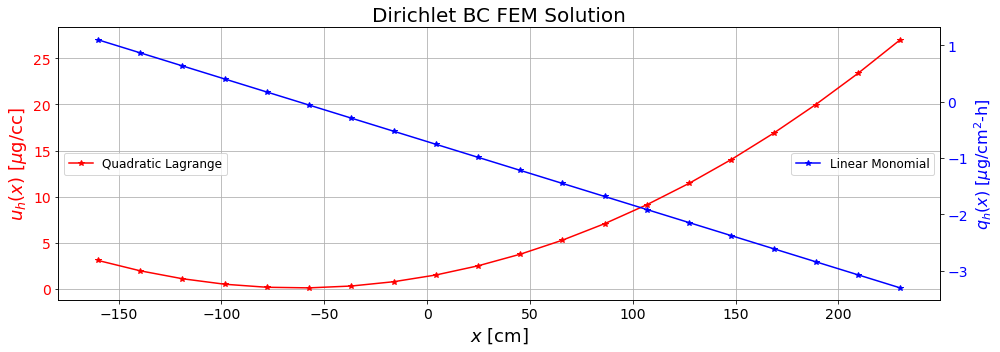

In [7]:
'''Show FEM Solution and Flux'''


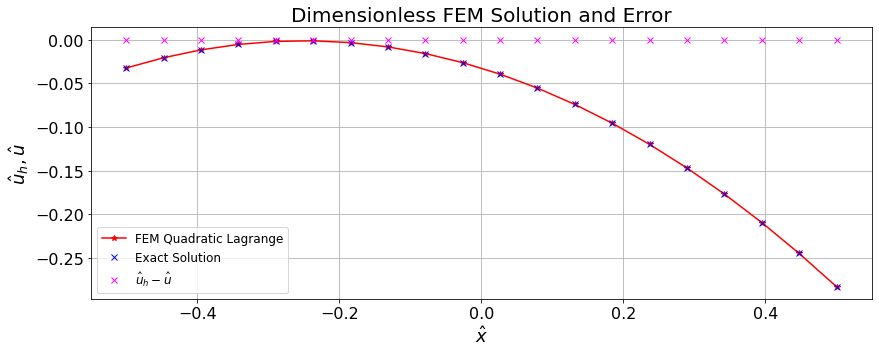

In [8]:
'''Error Compared to Exact Dimensionless Solution'''


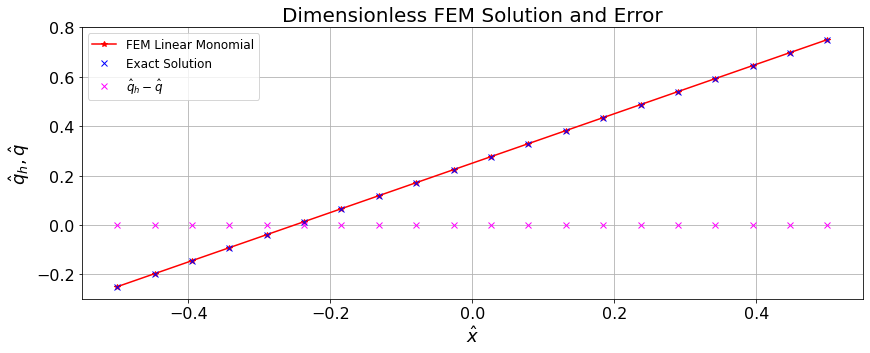

In [9]:
'''Flux Error Compared to Exact Dimensionless Solution'''


In [10]:
'''Relative Energy Error'''


FEM energy   [] = 1.472751e-01
Exact energy [] = 1.472750e-01
Energy rel. error [%] =  1.785e-05


## <span style="color:blue">[Assignment 2 (45 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue">[2.1)](#toa)(45 pts) Using the Galerkin FEM and the MOOSE framework solve the diffusion problem in 1.3) using linear Lagrange polynomial basis functions and compute the minimum number of elements to reduce the relative energy error to less than 0.1%.</span>
</span><a id="a21"></a>

In [ ]:
'''Show FEM Solution and Flux'''


In [ ]:
'''Error Compared to Exact Dimensionless Solution'''


In [ ]:
'''Flux Error Compared to Exact Dimensionless Solution'''


In [17]:
'''Relative Energy Error'''


FEM energy   [] = 1.474192e-01
Exact energy [] = 1.472750e-01
Energy rel. error [%] =  9.791e-02


## <span style="color:blue">[Assignment 3 (5 pts)](#toa)</span><a id="a3"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>

**Answer:**